# **Rainfall Anomaly Index (RAI)**
**Tolga Barış Terzi – 2025**

This notebook demonstrates example calculations of the **Rainfall Anomaly Index (RAI)** and the **Modified Rainfall Anomaly Index (mRAI)**, following the methodology of **van Rooy (1965)** and **Gibbs & Maher (1967)**.

RAI quantifies meteorological drought by measuring deviations of **monthly precipitation (P)** from long-term climatology, while mRAI provides a **month-wise adjustment** to account for seasonal variability.

---

## **RAI Methodology Overview**

1. **Aggregation**: Accumulate precipitation over the selected time scale (e.g., 1, 3, 6, 12 months).  
2. **Computation**: Calculate anomalies relative to the mean and scale by extremes:

   - **RAI**:
     $$
     \text{RAI} =
     \begin{cases} 
     \text{scale} \cdot \dfrac{P - \overline{P}}{\text{mean(top 10)} - \overline{P}}, & P > \overline{P} \\
     -\text{scale} \cdot \dfrac{P - \overline{P}}{\text{mean(bottom 10)} - \overline{P}}, & P \leq \overline{P}
     \end{cases}
     $$

   - **mRAI (month-wise)**:
     $$
     \text{mRAI}_m =
     \begin{cases} 
     \text{scale} \cdot \dfrac{P - \text{median}_m}{\text{mean(top 10\%}_m) - \text{median}_m}, & P \geq \text{median}_m \\
     -\text{scale} \cdot \dfrac{P - \text{median}_m}{\text{mean(bottom 10\%}_m) - \text{median}_m}, & P < \text{median}_m
     \end{cases}
     $$

3. **Month-wise adjustment (optional)**: Compute anomalies separately for each calendar month.

---

## **Required Packages**

In [1]:
import pandas as pd
import numpy as np
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:
  
- **Precipitation** 

The data is from the **Seyhan River Basin, Turkey**, covering the period **October 1964 – September 2011**, which corresponds to hydrological years **1965–2011**.

In [6]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


---
## **Calculate RAI**

In this example, we calculate monthly **RAI** values using precipitation data.

- **Precipitation** is selected from the dataset.

We use the `pydrght.RAI` class to calculate:

1. **RAI**: The standard Rainfall Anomaly Index, which quantifies deviations of monthly precipitation from the long-term mean and scales by the extremes.
2. **mRAI**: The Modified Rainfall Anomaly Index, which adjusts the RAI for each calendar month to account for seasonal variability.

=== Standard RAI ===


DATE
1965-09-01   -0.461455
1965-10-01   -0.268116
1965-11-01   -0.764261
1965-12-01    0.353786
1966-01-01    1.982747
dtype: float64

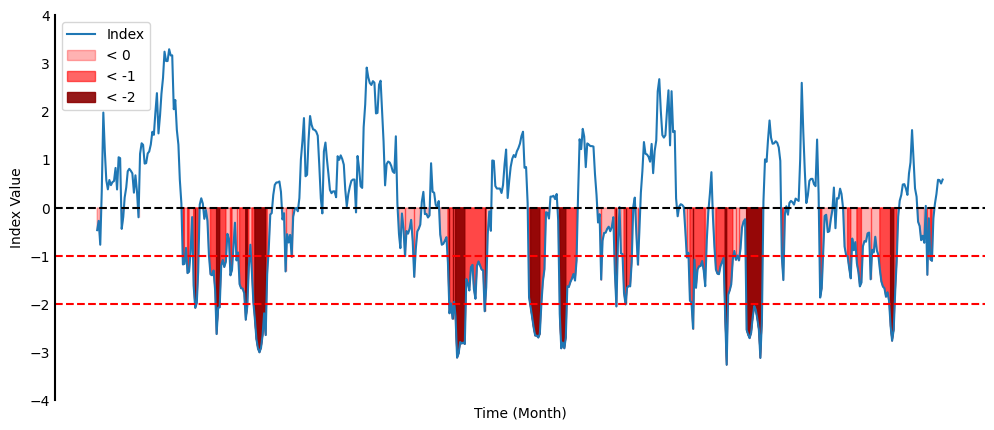

=== Modified RAI (mRAI) ===


DATE
1965-09-01   -0.194795
1965-10-01   -0.039495
1965-11-01   -0.470368
1965-12-01    0.344514
1966-01-01    1.630238
dtype: float64

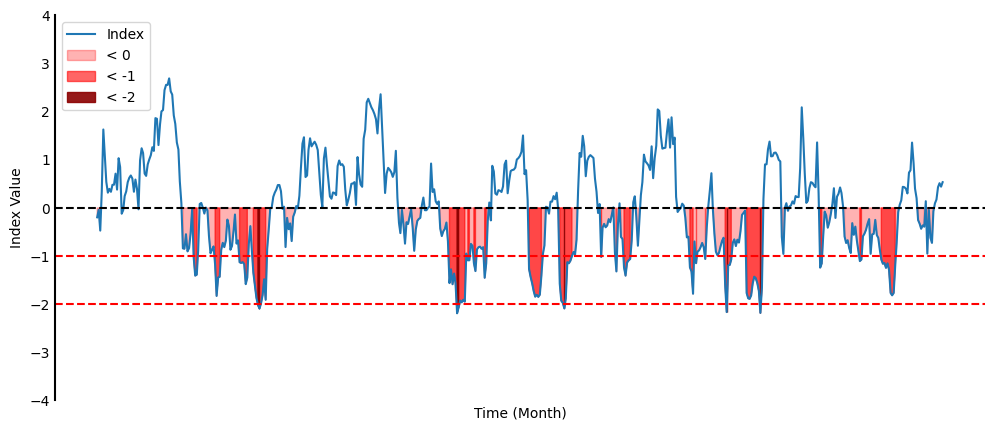

In [5]:
# Select precipitation column
precip = df['PRECIPITATION']

# Initialize RAI class
rai = pydrght.RAI(precip=precip, ts=12)

# === Standard RAI ===
RAI_values = rai.RAI()
print("=== Standard RAI ===")
display(RAI_values.head())

pydrght.utils.plot_index_with_severity(RAI_values)

# === Modified RAI (mRAI) ===
mRAI_values = rai.mRAI()
print("=== Modified RAI (mRAI) ===")
display(mRAI_values.head())

pydrght.utils.plot_index_with_severity(mRAI_values)

---

## **References**

- van Rooy, M. P. (1965). *A rainfall anomaly index (RAI) independent of time and space.* Notos, 14, 43–48.  

- Gibbs, W. J., & Maher, J. V. (1967). *Rainfall deciles as drought indicators.* Bureau of Meteorology Bulletin No. 48, Commonwealth of Australia, Melbourne.  